1.Read CSV File
  Describe Dataset
  Print first 5 and last 5 elements of Dataset


In [95]:
import matplotlib.pyplot as plt
import numpy as np
import math as mth
import pandas as pd
from scipy import stats
import seaborn as sns
import os
import scipy as py
churn=pd.read_csv('~/Customer Behavior Data to Improve Customer Retention.csv',sep='\t', delimiter=None)
churn.describe()
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20) 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [96]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
churn.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Convert TotalCharges to Float since the column is not of correct datatype

In [98]:
churn.dtypes
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


2) Missing Value Check

In [99]:
print (churn.apply(lambda x: sum(x.isnull()),axis=0))

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


3)Inappropriate data check
4)check for overall plausibility and errors (e.g., typos, unreasonable ranges)

In [100]:
gender=['Male','Female']
churn_gender=churn.gender.unique()
set(gender)==set(churn_gender)
print('No inappropriate values in gender column')

agegroup=[0,1]
churn_agegroupe=churn.SeniorCitizen.unique()
set(churn_agegroupe)==set(agegroup)
print('No inappropriate values in SeniorCitizen column column')

print('Negative values for tenure:')
print(sum(churn['tenure']<0))
print('Number of columns with 0 values for tenure:')
print(sum(churn['tenure']==0))

#to check if monthly charges has negative values or 0
print('Negative or 0 values for MonthlyCharges:')
print(sum(churn['MonthlyCharges']<=0))

print('Negative or 0 values for TotalCharges:')
print(sum(churn['TotalCharges']<=0))

churn_1=['Yes','No']
churn_csv=churn.Churn.unique()
set(churn_1)==set(churn_csv)
print('No inappropriate values in Churn column')

print("Gender desription:")
print(churn["gender"].unique())
#churn["gender"].mode()

print("SeniorCitizen desription:")
print(churn["SeniorCitizen"].unique())

print("Partner desription:")
print(churn["Partner"].unique())

print("Dependents  desription:")
print(churn["Dependents"].unique())

print("MultipleLines:")
print(churn["MultipleLines"].unique())

print("InternetService:")
print(churn["InternetService"].unique())

print("OnlineSecurity:")
print(churn["OnlineSecurity"].unique())

print("OnlineBackup:")
print(churn["OnlineBackup"].unique())

print("DeviceProtection:")
print(churn["DeviceProtection"].unique())

print("TechSupport:")
print(churn["TechSupport"].unique())

print("StreamingTV:")
print(churn["StreamingTV"].unique())

print("StreamingTV:")
print(churn["StreamingTV"].unique())

print("Contract:")
print(churn["Contract"].unique())

print("PaperlessBilling:")
print(churn["PaperlessBilling"].unique())

print("PaymentMethod:")
print(churn["PaymentMethod"].unique())

print("TotalCharges:")
print(churn["TotalCharges"].unique())

print("Churn:")
print(churn["Churn"].unique())


No inappropriate values in gender column
No inappropriate values in SeniorCitizen column column
Negative values for tenure:
0
Number of columns with 0 values for tenure:
11
Negative or 0 values for MonthlyCharges:
0
Negative or 0 values for TotalCharges:
0
No inappropriate values in Churn column
Gender desription:
['Female' 'Male']
SeniorCitizen desription:
[0 1]
Partner desription:
['Yes' 'No']
Dependents  desription:
['No' 'Yes']
MultipleLines:
['No phone service' 'No' 'Yes']
InternetService:
['DSL' 'Fiber optic' 'No']
OnlineSecurity:
['No' 'Yes' 'No internet service']
OnlineBackup:
['Yes' 'No' 'No internet service']
DeviceProtection:
['No' 'Yes' 'No internet service']
TechSupport:
['No' 'Yes' 'No internet service']
StreamingTV:
['No' 'Yes' 'No internet service']
StreamingTV:
['No' 'Yes' 'No internet service']
Contract:
['Month-to-month' 'One year' 'Two year']
PaperlessBilling:
['Yes' 'No']
PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Observation:
The data is read and saved now.
There is no missing data in the dataset.
Since there are no missing values, no replacement is required.
There are no inappropriate values observed in the numeric as well as non numeric values.
The data seems to be logical and valid with no weired values.

5) Check Outliers

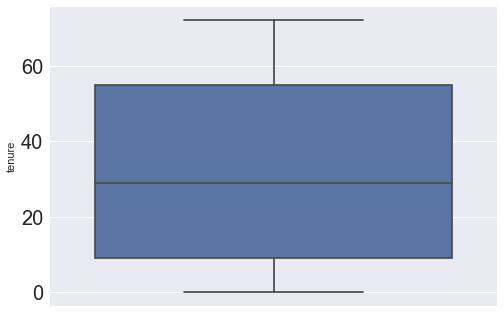

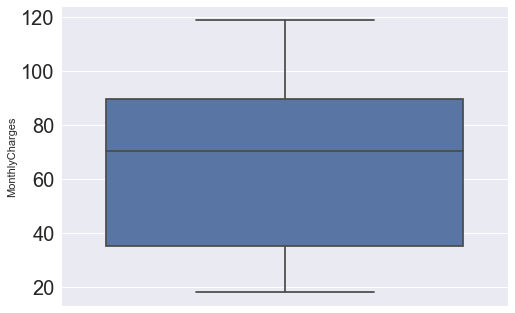

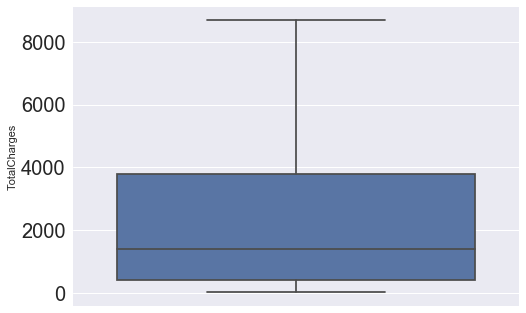

In [108]:
sns.boxplot(y="tenure", data=churn, fliersize=5)
plt.show()

sns.boxplot(y="MonthlyCharges", data=churn, fliersize=5)
plt.show()

sns.boxplot(y="TotalCharges", data=churn, fliersize=10)
plt.show()

Observation: There are no outliers in the above plotted individual boxplots.

6) Identify highly correlated variables

In [109]:
print(churn.corr())

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


Observation: From the above results, it is observed that tenure and totalcharges are highly correlated columns.
This seems legitimate because the more the tenure, the more the total charges would be.
The senior citizen data seems relatively less correlated to other columns.

7)Identify variables with (nearly) no variance

In [110]:
print (np.var(churn))

SeniorCitizen     1.358552e-01
tenure            6.030825e+02
MonthlyCharges    9.052824e+02
TotalCharges      5.137522e+06
dtype: float64


Observation: There is no data with no variance or less variance.

8)Identify variables with strange names or values

Observation: There seems to be no such strange named or valued variables.

9) Check variable classes (eg. Characters vs factors)

Observation: NA

10) Remove/transform some variables (maybe your model does not like categorial variables)

Observation: The column TotalCharges was non-numeric. Hence, its datatype was updated to Float for analysis above.

11) Rename some variables or values (if not all data is useful)

Observation: Some columns seem to be less useful like TechSupport and DeviceProtection. Data in another column have some or the other factor for customer churn.

12) Check some overall pattern (statistical/ numerical summaries)

In [111]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


13) Possibly center/scale variables

NA

Exploratory Data Analysis checklist

1) Five number summaries (mean/median, min, max, q1, q3)

In [112]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Plots:

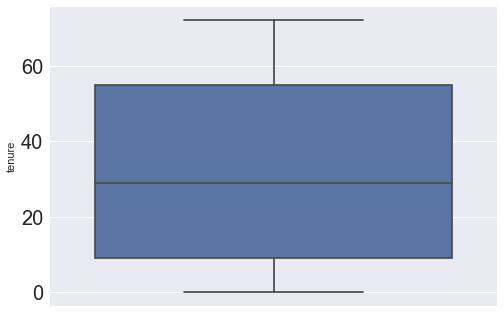

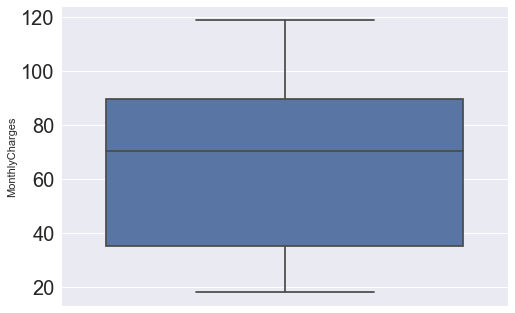

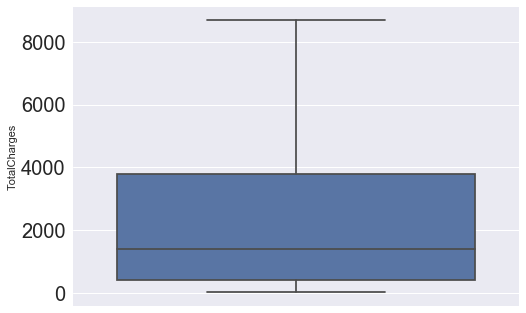

In [113]:
sns.boxplot(y="tenure", data=churn, fliersize=5)
plt.show()
sns.boxplot(y="MonthlyCharges", data=churn, fliersize=5)
plt.show()
sns.boxplot(y="TotalCharges", data=churn, fliersize=5)
plt.show()

Observation:No outliers observed. the data in all columns seems to be evenly ditrubuted over the mean, min and max values.
The tenure box plots shows that in all there are more old customers than new customers. More customers opt for the lower monthly charges plan.

2) Histograms

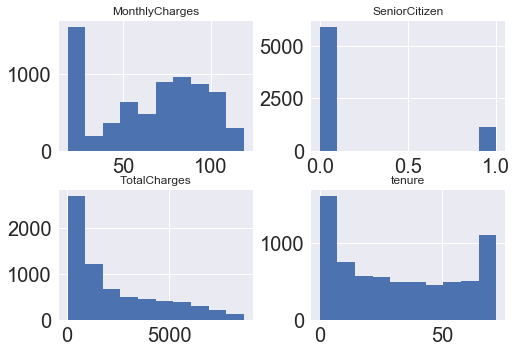

In [114]:
churn.hist()
plt.show()

Observation:
Monthly Charges: More than 1500 customers fall under the category of amount raning from 20-30 units.
Senior Citizen: More than 85% of the customers are NOT senior citizens.
Total Charges: The number of customers is inversly proportional to the charges.
Tenure: There are more number of customers who are very new or very old.
    

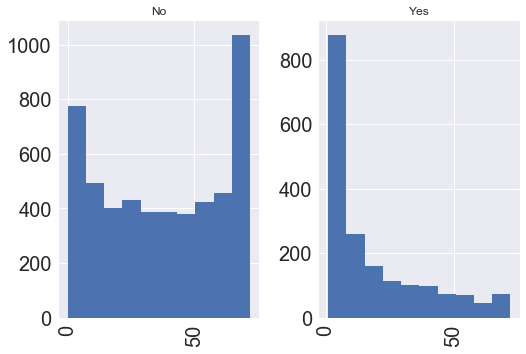

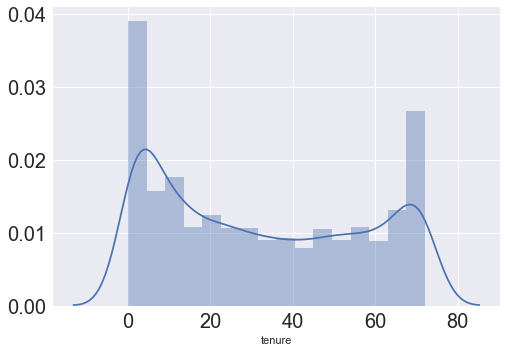

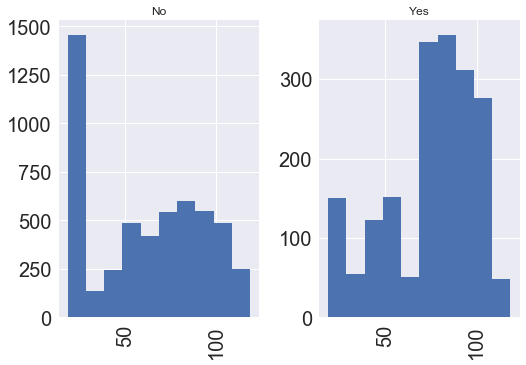

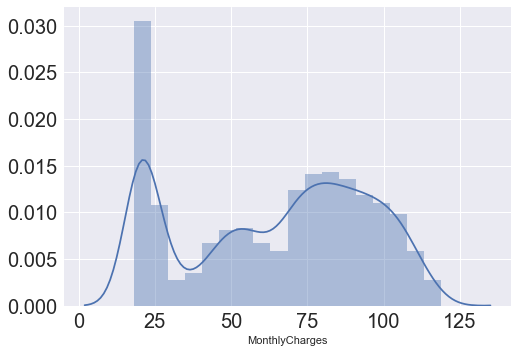

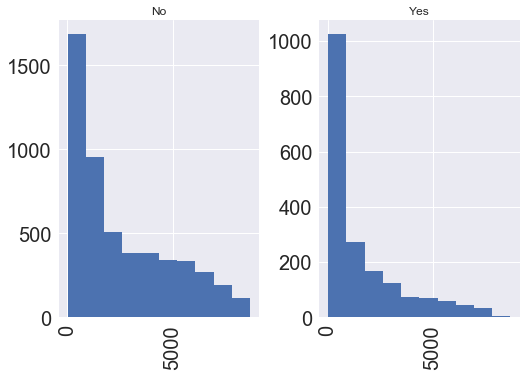

In [115]:
churn.hist("tenure", "Churn")
plt.show()
sns.distplot(churn['tenure'])
plt.show()

churn.hist("MonthlyCharges", "Churn")
plt.show()
sns.distplot(churn['MonthlyCharges'])
plt.show()

churn.hist("TotalCharges", "Churn")
plt.show()
#sns.distplot(churn['TotalCharges'])
#plt.show()

Observation:

The data for tenure, Monthly charges and Total charges doesnot seem to be normally distributed.
According to the histogram the oldest customers are retained whereas the newer customers are churned.
Also, more of the customers paying high monthly charges were churned as compared to the ones paying less monthly charges. 

3) Line charts

In [ ]:
NA

4) Box and whisker plots

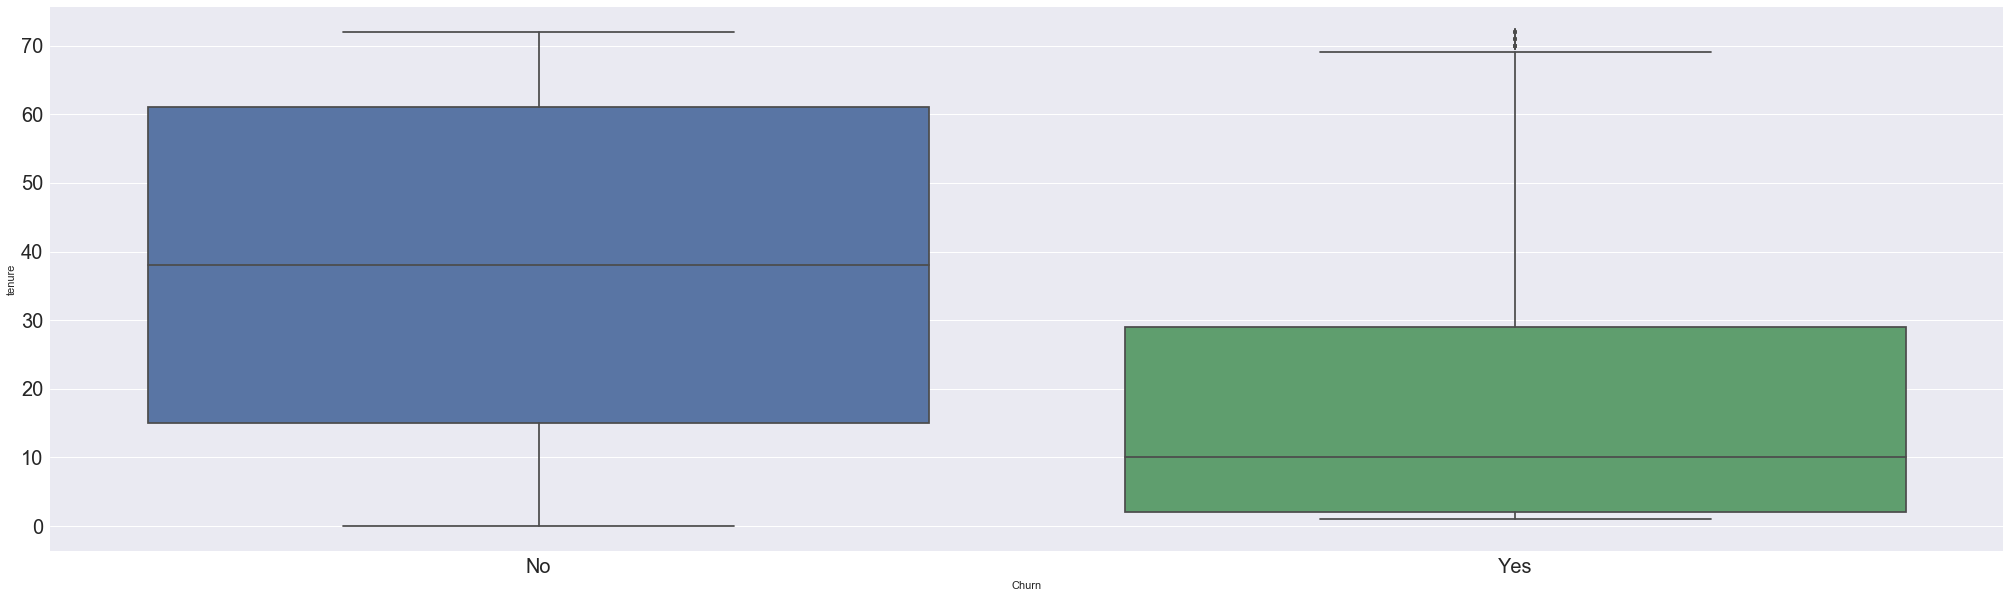

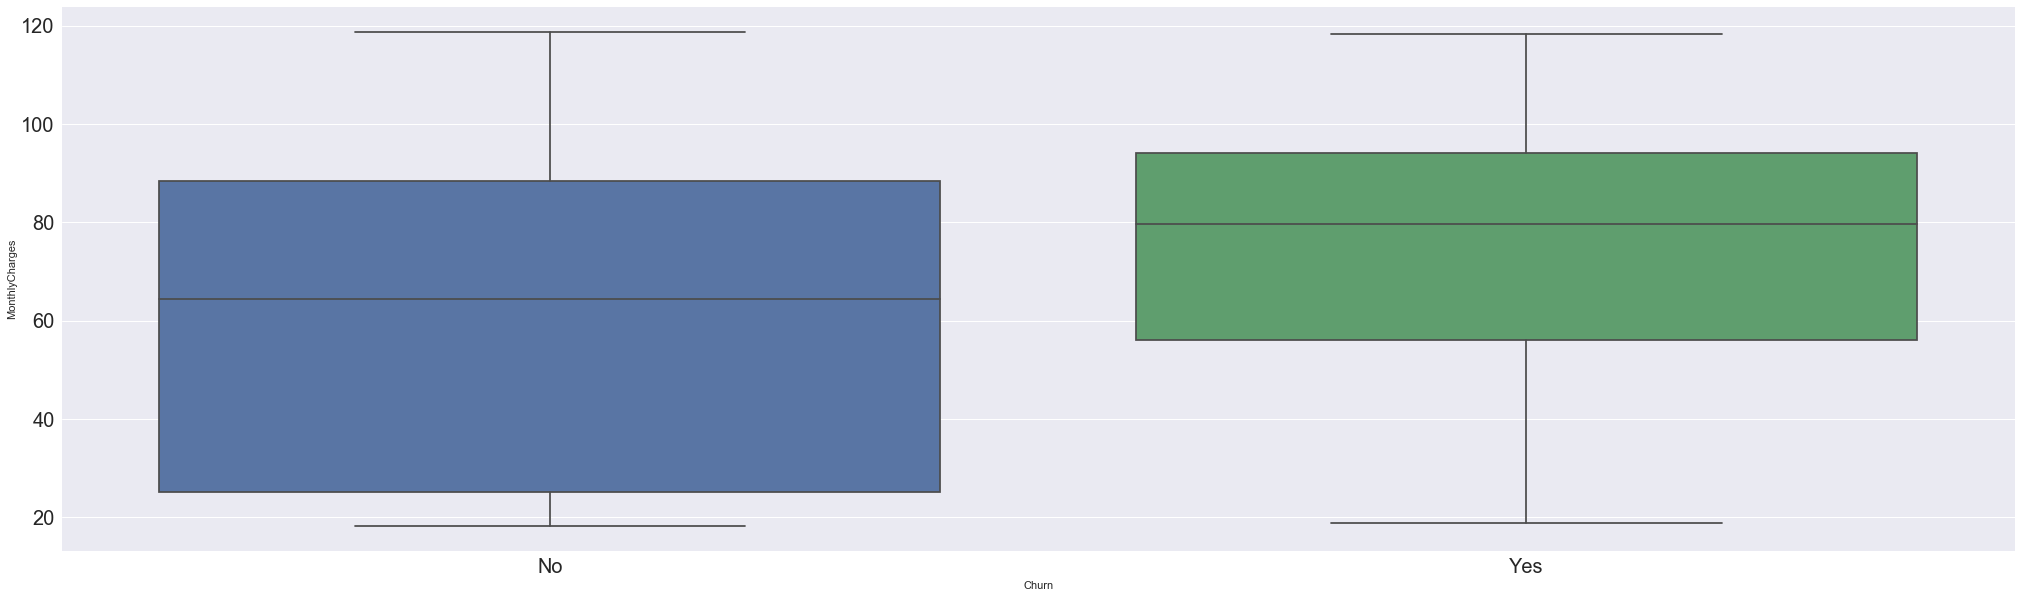

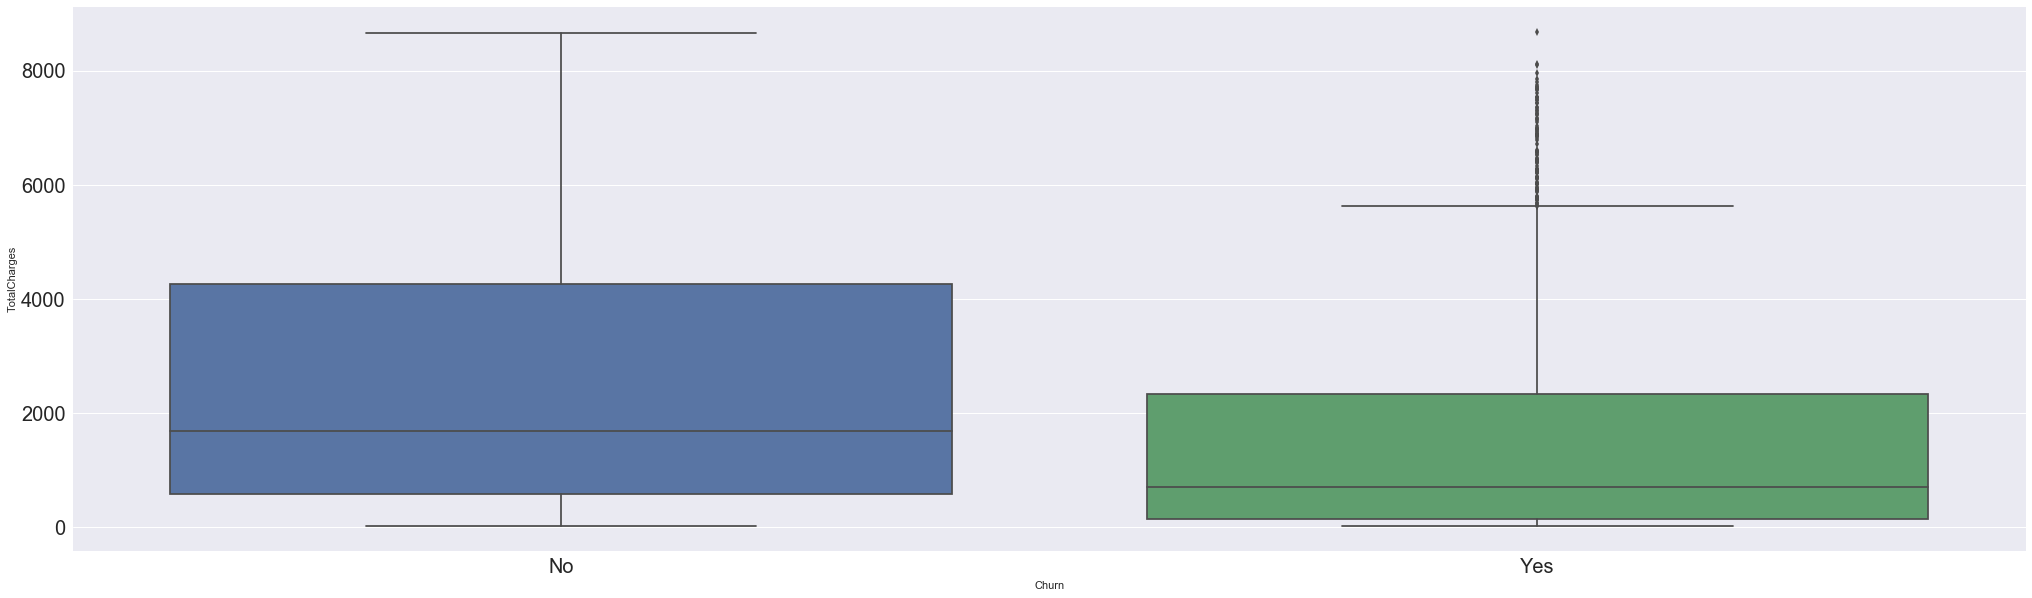

In [135]:
sns.boxplot(y="tenure",x="Churn", data=churn, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))
sns.boxplot(y="MonthlyCharges",x="Churn", data=churn, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))
sns.boxplot(y="TotalCharges",x="Churn", data=churn, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))


Observation:The retained customers are equally distributed in the tenure. There are outliers observed in the data for the customer who got churned. They are either very new or very old customers.
There are many outliers observed in the churned customer values against total charges. This can mean that customers churn is not very correlated to totalcharges paid by them..

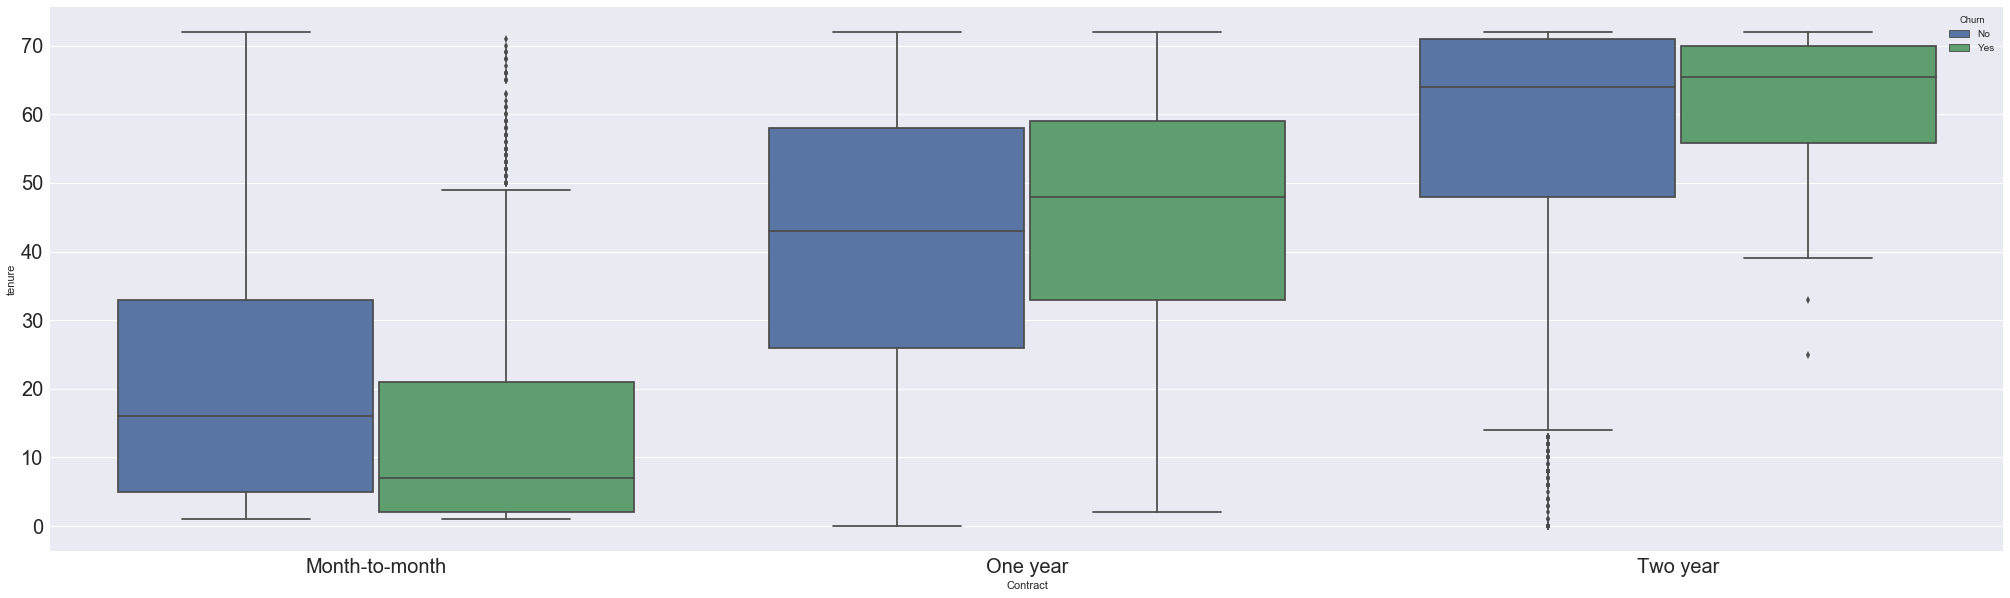

In [122]:
sns.boxplot(y="tenure",x="Contract", hue="Churn" ,data=churn, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))


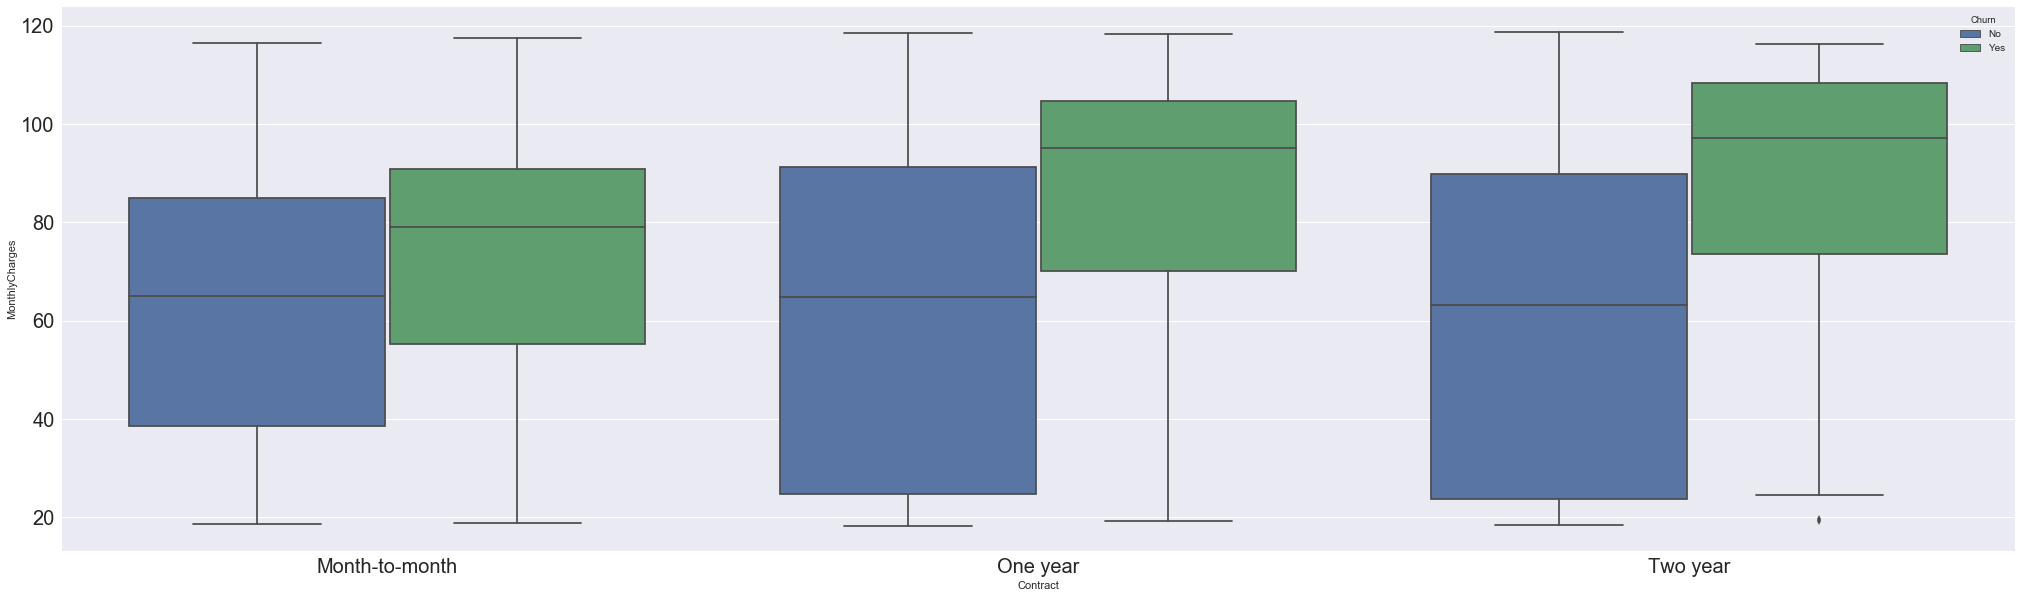

In [123]:
sns.boxplot(y="MonthlyCharges",x="Contract", hue="Churn",data=churn, fliersize=5)
plt.show()
plt.figure(figsize=(35,10))

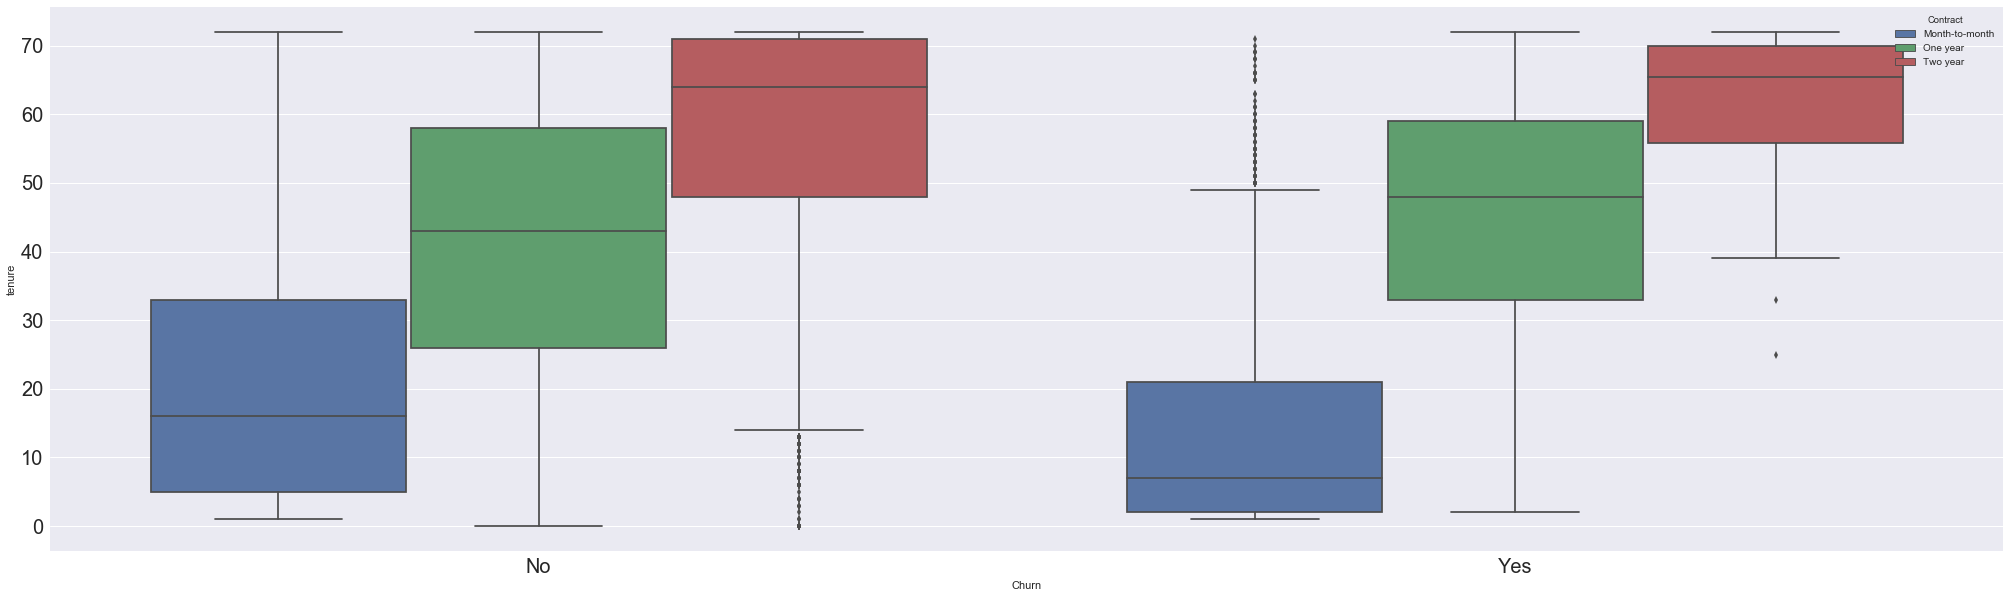

In [137]:
sns.boxplot(y="tenure",x="Churn", hue="Contract", data=churn, fliersize=5)
plt.show()

Observation: A few outliers in the two-year plans suggest that there are few new customers who take a two-year plan directly.
Most of the new customers take monthly plans only.

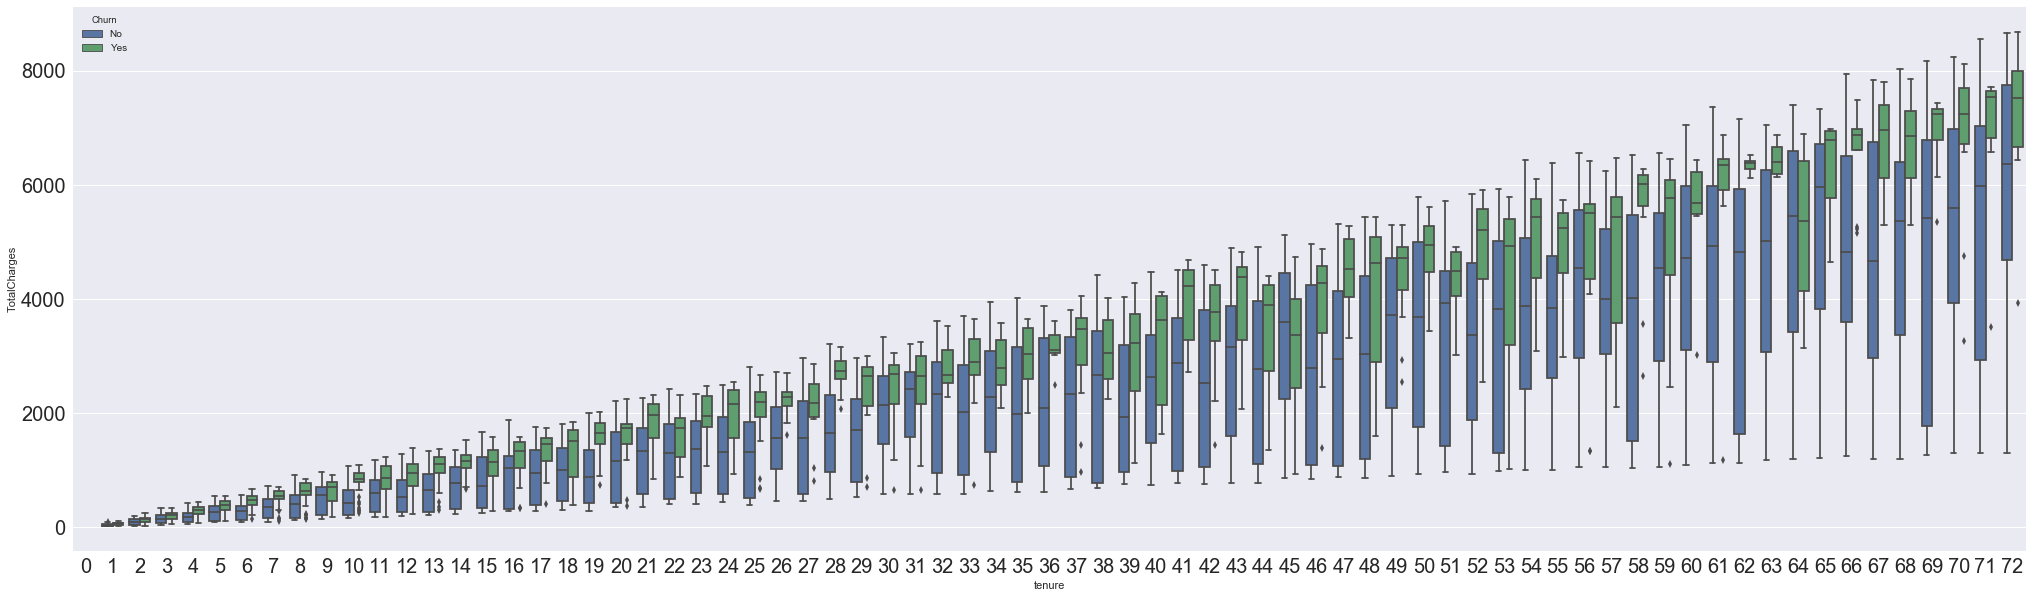

In [124]:
sns.boxplot(y="TotalCharges",x="tenure", hue="Churn",data=churn)
plt.show()
plt.figure(figsize=(35,10))

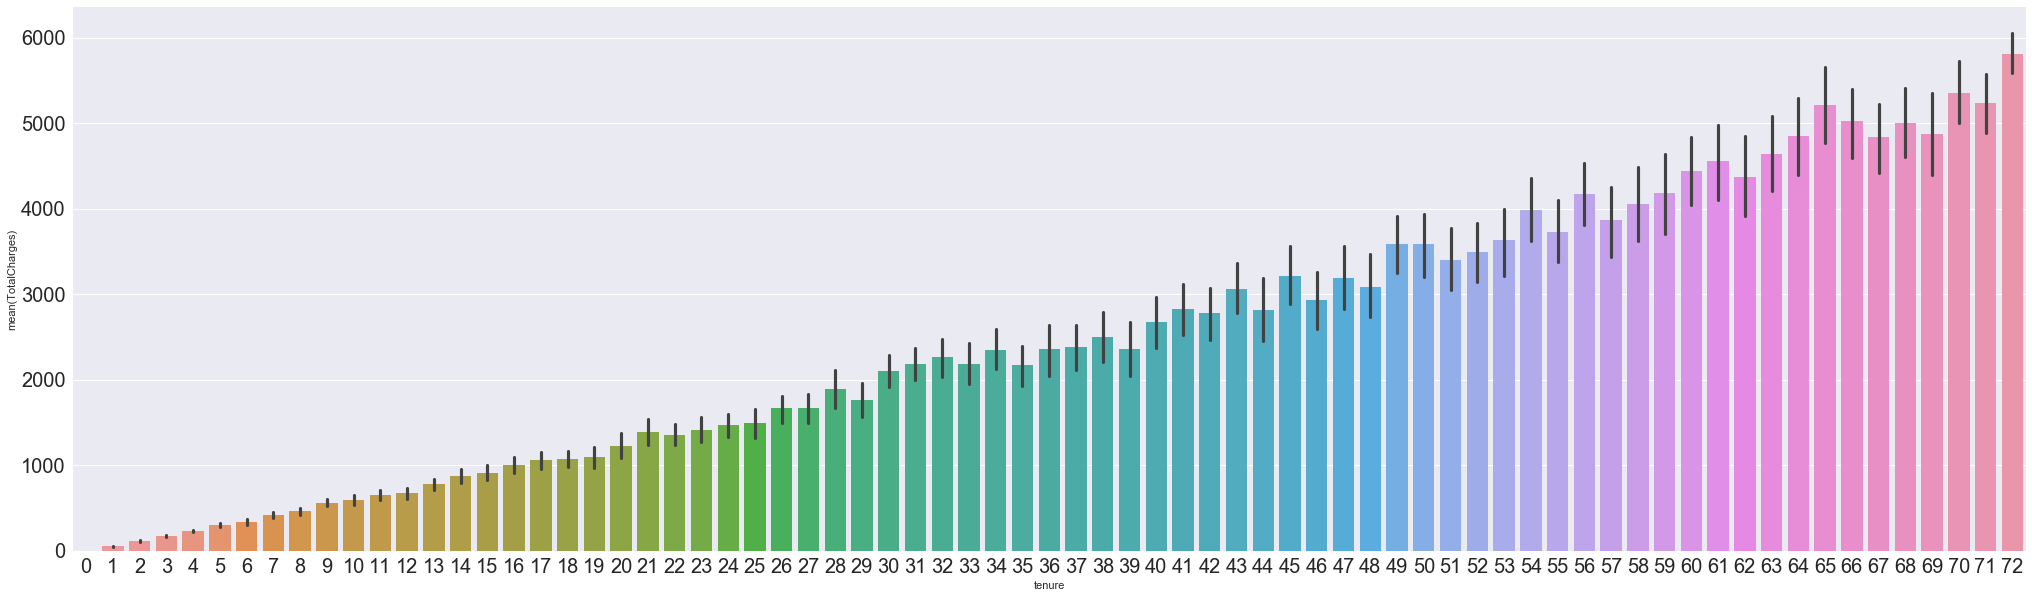

In [120]:
sns.barplot(y="TotalCharges",x="tenure", data=churn)
plt.show()
plt.figure(figsize=(35,10))

Observation:

The tenure and Totalcharges are highly correlated as we can see an exponential curve.
Also, the correlation matrics proves the fact of high correlation between them.

In [ ]:
#sns.pairplot(churn,y_vars=churn["TotalCharges"], x_vars=churn["tenure"], hue="Churn")
#plt.show()

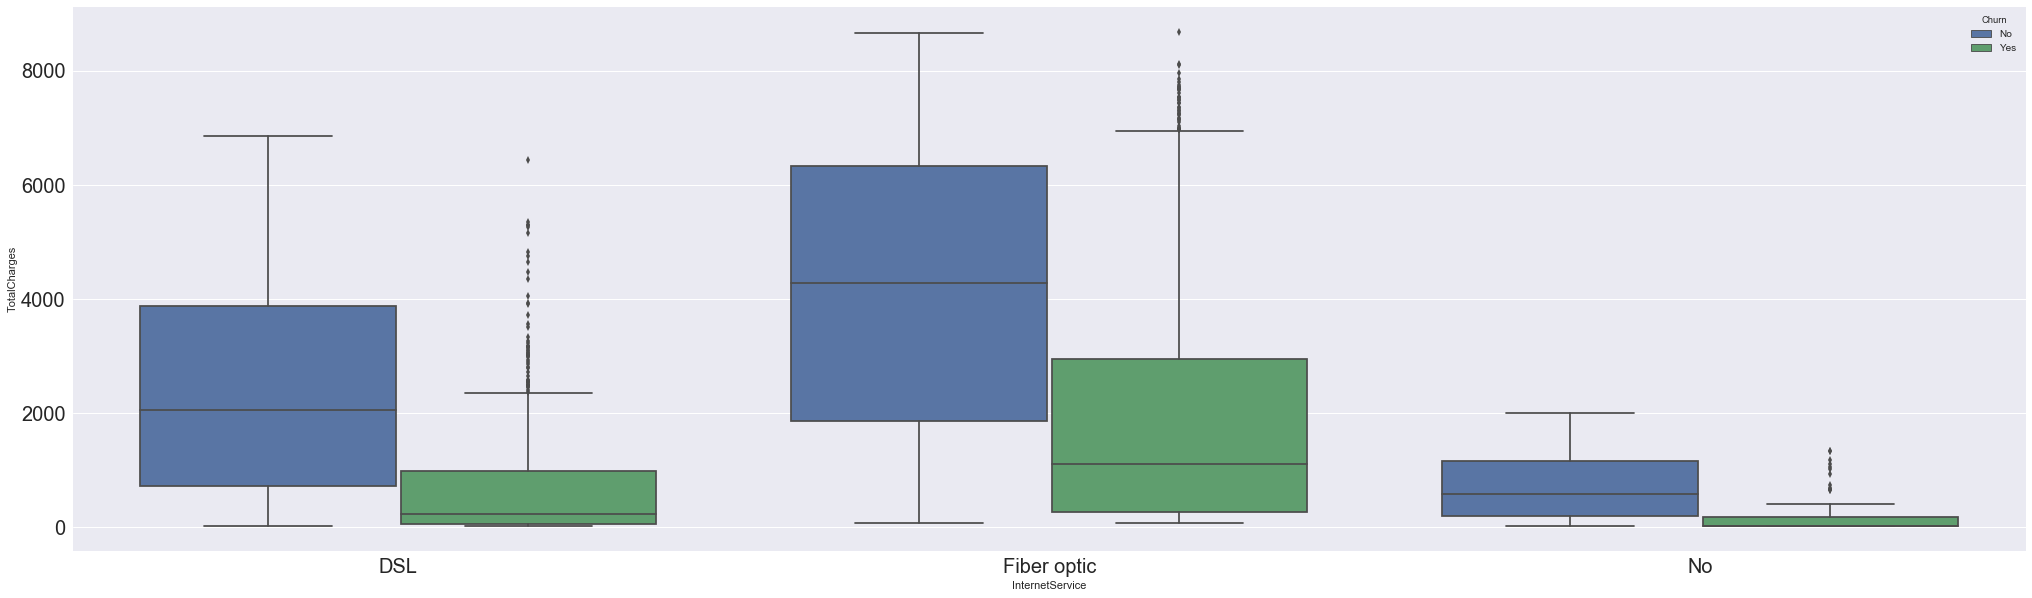

In [140]:
sns.boxplot(y="TotalCharges",x="InternetService", hue="Churn",data=churn)
plt.show()
plt.figure(figsize=(35,10))

Observation: Total Charges for Fibre Optic internetService are more than the other two internet service options.

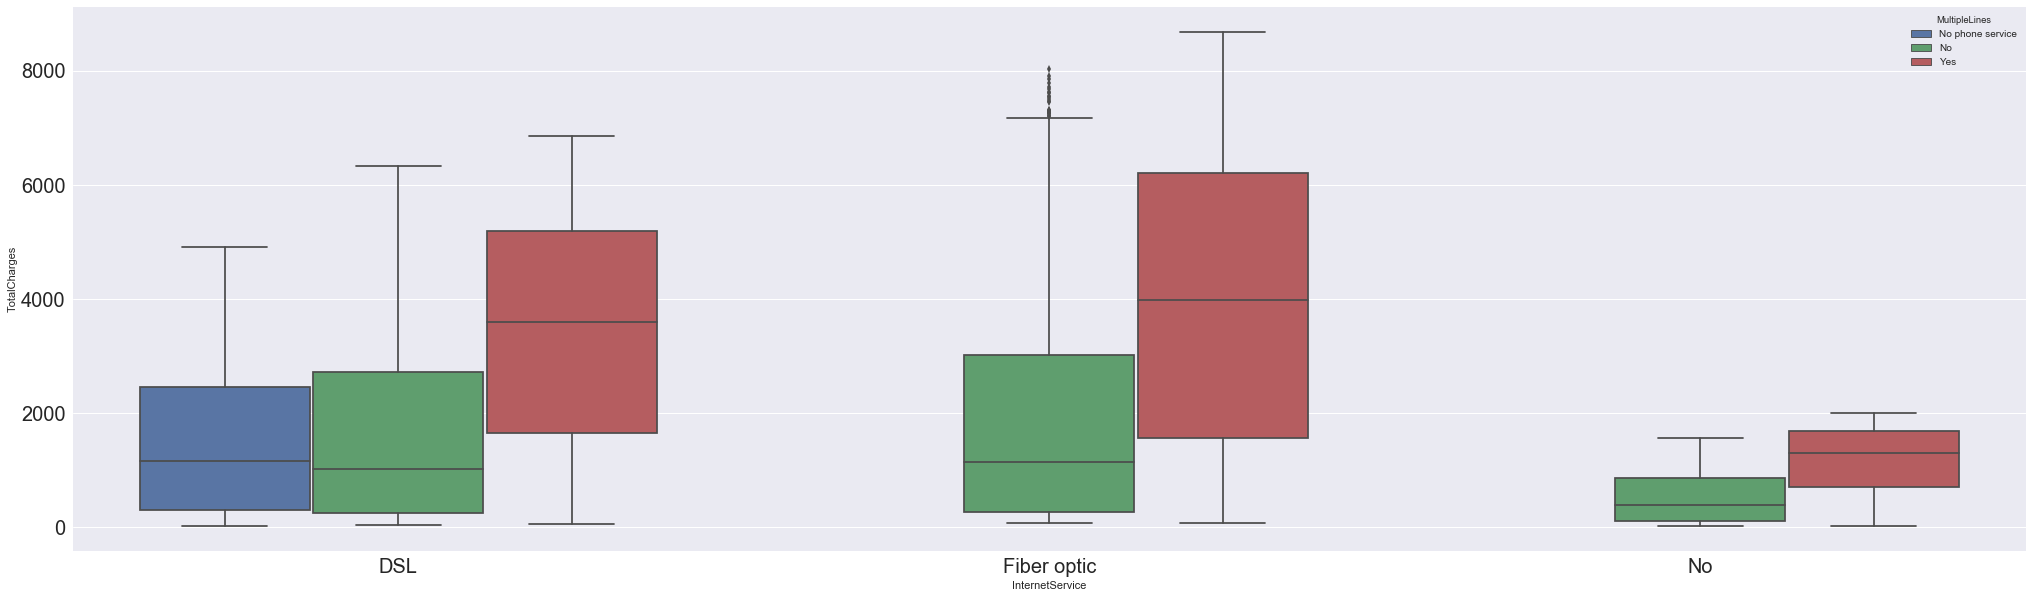

In [141]:
sns.boxplot(y="TotalCharges",x="InternetService", hue="MultipleLines",data=churn)
plt.show()
plt.figure(figsize=(35,10))

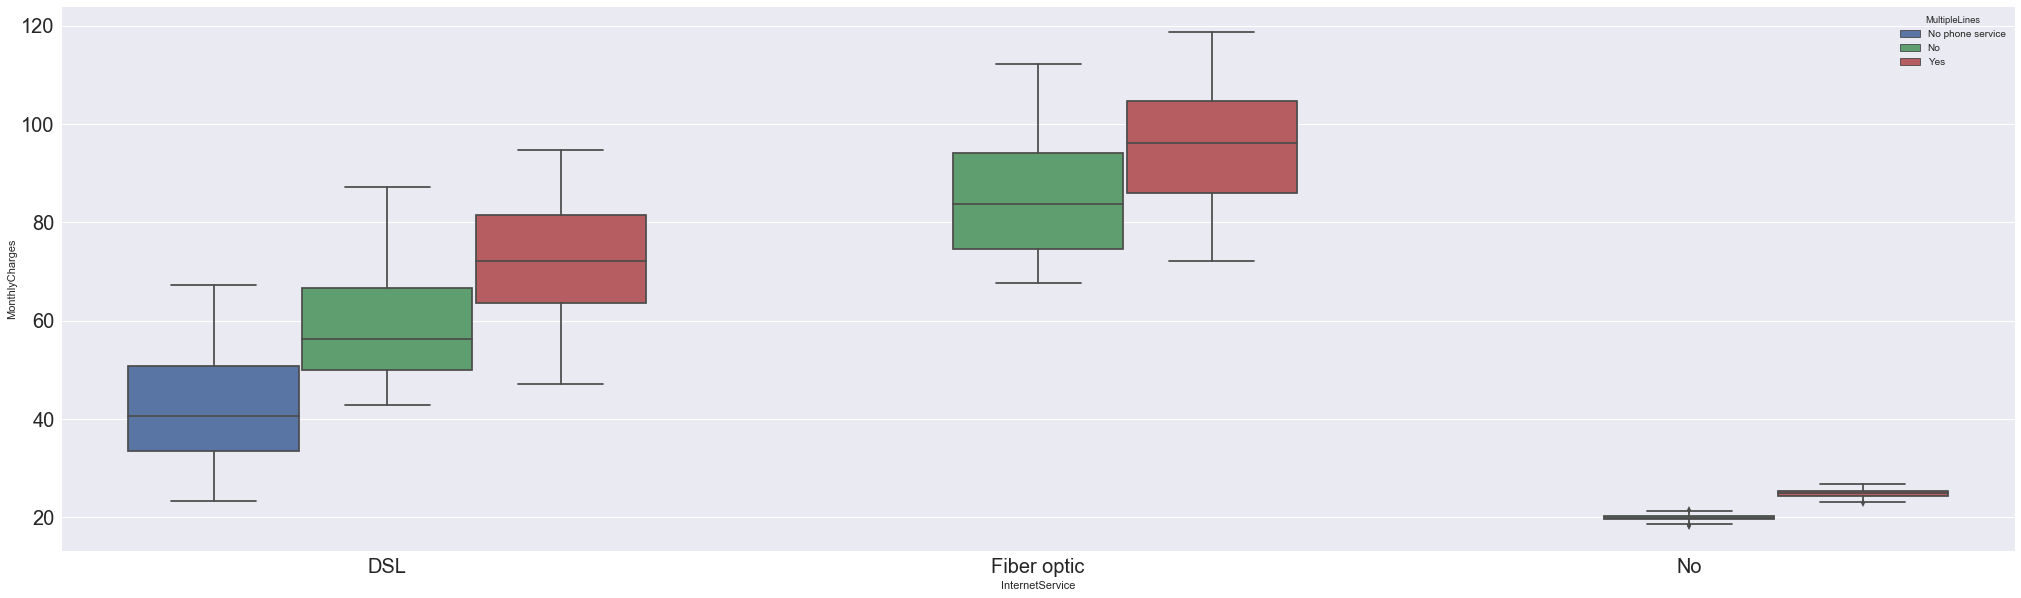

In [155]:
sns.boxplot(y="MonthlyCharges",x="InternetService", hue="MultipleLines",data=churn)
plt.show()
plt.figure(figsize=(35,10))

Observation: Lowest monthly charges are for the customers having NO Multiple lines.
Thus, it can be interfered that Monthly charges is proportional to the number of lines taken.


Summary:
The dataset consists  of the customer churn.
There can be many factors which can result in losing a customer. 
The data set has various columns which shows details about the services the customer took, the charges the customer paid, 
the payment methods of the customer as well as the tenure of the customer with the service company.
The prime focus is to analyze the reason for the customer retention and customer churning and 
thus take corrective measures for the retention.
Since, there were not more than 10% of numeric columns, exploratory data is not enough to identify a strong reason for the churn.
This will require further analysis using decisions Trees or other techniques.
However, the data cleaning and exploratory data analysis has helped identify that there are no missing, inappropriate values or ambigous values in the dataset.
There is a strong correlation between TotalCharges and Tenure. There is very less variance is the data and no data column is normally distributed.
We were able to see few outliers while plotting few combination of data columns.
There are histograms and boxplots plotted for visualizing the realtions between different columns using churn as a hue which helped to compare the 
statistical behaviour of the retained customers versus churned customers.